In [3]:
import kagglehub
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

file_path = Path('sea-levels-news.csv')
# df = pd.read_csv(file_path)
df = pd.read_csv(file_path)
df.head()

,country,Day,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data
0,World,1880-04-15,-183.31406,-183.31406
1,World,1880-07-15,-183.24739,-183.24739
2,World,1880-10-15,-174.14740,-174.14740
3,World,1881-01-15,-159.68073,-159.68073
4,World,1881-04-15,-172.41406,-172.41406


In [5]:
# Convert the 'Day' column to datetime format
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')

# Verify the conversion
df.head()

,country,Day,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data
0,World,1880-04-15,-183.31406,-183.31406
1,World,1880-07-15,-183.24739,-183.24739
2,World,1880-10-15,-174.14740,-174.14740
3,World,1881-01-15,-159.68073,-159.68073
4,World,1881-04-15,-172.41406,-172.41406


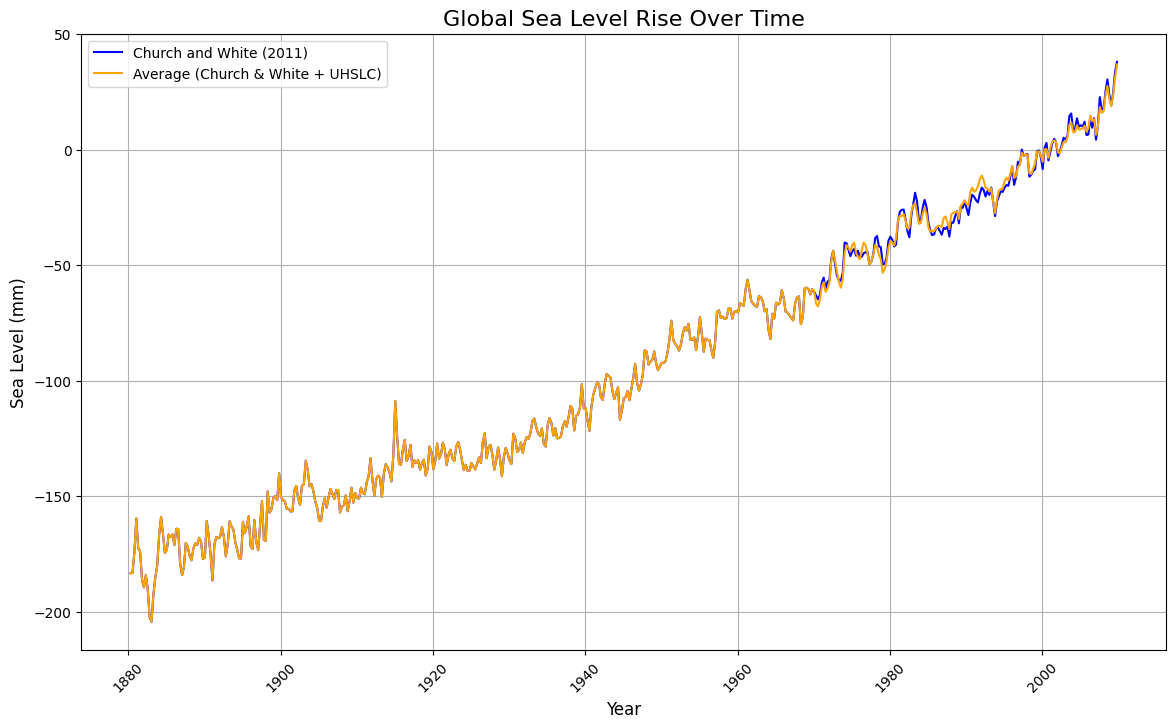

In [9]:
# Plotting the global sea level trend
plt.figure(figsize=(14, 8))

# Plot the two sea level columns
sns.lineplot(data=df, x='Day', y='Global sea level according to Church and White (2011)', label='Church and White (2011)', color='blue')
sns.lineplot(data=df, x='Day', y='Global sea level as an average of Church and White (2011) and UHSLC data', label='Average (Church & White + UHSLC)', color='orange')

# Add titles and labels
plt.title("Global Sea Level Rise Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sea Level (mm)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# Show the plot
plt.show()


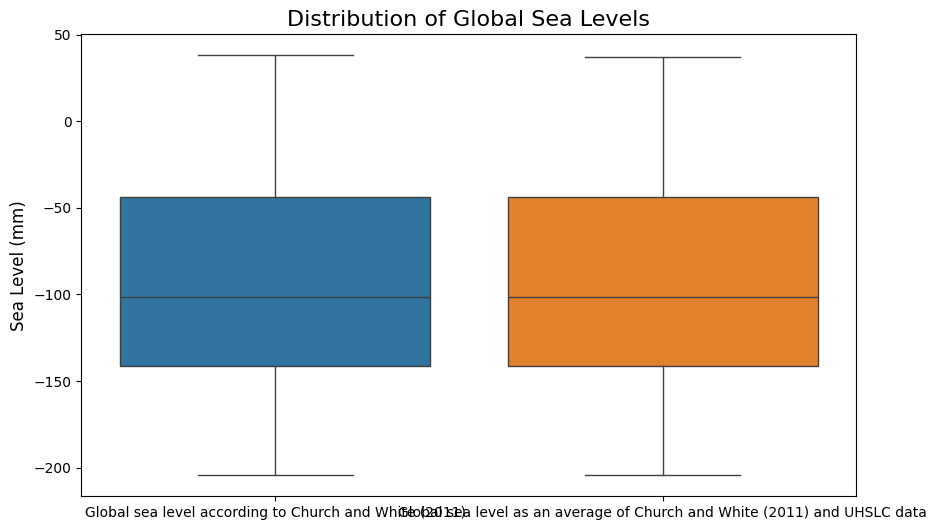

In [11]:
# Plotting the distribution using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Global sea level according to Church and White (2011)', 'Global sea level as an average of Church and White (2011) and UHSLC data']])

# Add titles and labels
plt.title("Distribution of Global Sea Levels", fontsize=16)
plt.ylabel("Sea Level (mm)", fontsize=12)

# Show the plot
plt.show()

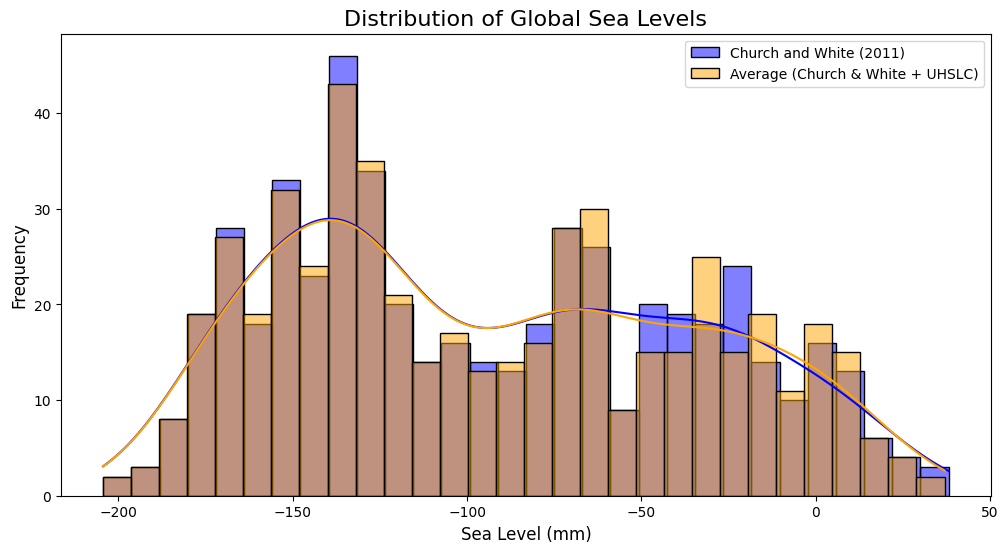

In [13]:
# Plotting the distribution of the sea level changes using histograms
plt.figure(figsize=(12, 6))

# Plot histograms for both datasets
sns.histplot(df['Global sea level according to Church and White (2011)'], kde=True, color='blue', label='Church and White (2011)', bins=30)
sns.histplot(df['Global sea level as an average of Church and White (2011) and UHSLC data'], kde=True, color='orange', label='Average (Church & White + UHSLC)', bins=30)

# Add titles and labels
plt.title("Distribution of Global Sea Levels", fontsize=16)
plt.xlabel("Sea Level (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

# Show the plot
plt.show()

In [15]:
# Convert the 'Day' column to datetime format
df['Day'] = pd.to_datetime(df['Day'])

# Extract year from the 'Day' column
df['Year'] = df['Day'].dt.year

# Display the updated dataframe to check the 'Year' column
df.head()


,country,Day,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data,Year
0,World,1880-04-15,-183.31406,-183.31406,1880
1,World,1880-07-15,-183.24739,-183.24739,1880
2,World,1880-10-15,-174.14740,-174.14740,1880
3,World,1881-01-15,-159.68073,-159.68073,1881
4,World,1881-04-15,-172.41406,-172.41406,1881


In [17]:
# Group the data by 'Year' and calculate the average sea level for each year
df_yearly = df.groupby('Year')['Global sea level as an average of Church and White (2011) and UHSLC data'].mean().reset_index()

# Calculate the yearly change in sea level
df_yearly['yearly_change'] = df_yearly['Global sea level as an average of Church and White (2011) and UHSLC data'].diff()

# Display the result to see the yearly changes
df_yearly.head()


,Year,Global sea level as an average of Church and White (2011) and UHSLC data,yearly_change
0,1880,-180.236283,NaN
1,1881,-173.039065,7.197218
2,1882,-191.580733,-18.541668
3,1883,-190.455727,1.125005
4,1884,-166.597397,23.858330


In [19]:
# Calculate the range of yearly changes (min and max)
change_range = df_yearly['yearly_change'].agg(['min', 'max'])
print(f"Range of yearly changes in sea level: {change_range}")


Range of yearly changes in sea level: min   -18.541668
max    23.858330
Name: yearly_change, dtype: float64


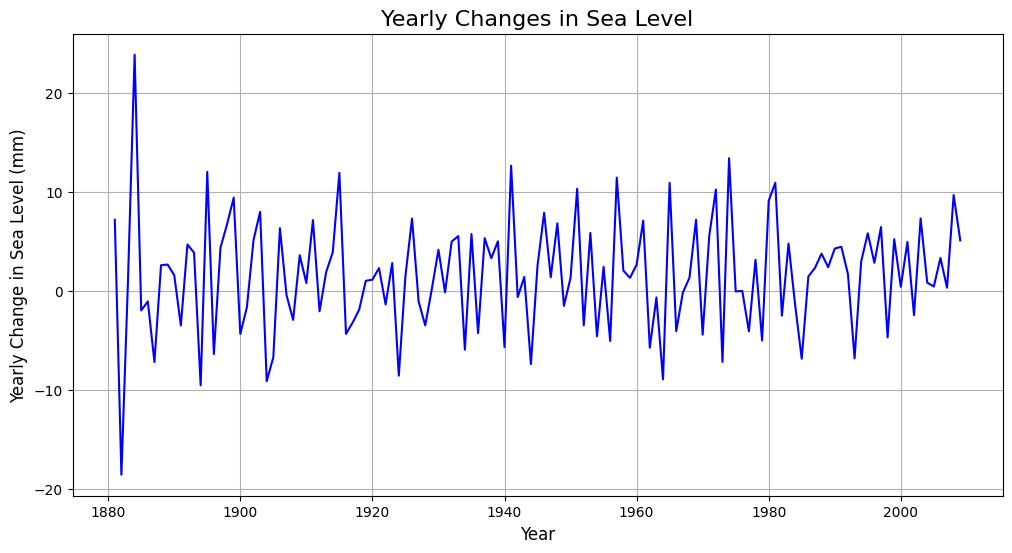

In [21]:
# Plotting the yearly changes in sea level
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='Year', y='yearly_change', color='blue')

# Add titles and labels
plt.title("Yearly Changes in Sea Level", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yearly Change in Sea Level (mm)", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [23]:
!pip install folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ---------------------------------------- 108.9/108.9 kB 1.3 MB/s eta 0:00:00


In [27]:
# import folium
# from folium.plugins import HeatMap

# # Create a map centered around a global location (e.g., at the center of the dataset)
# m = folium.Map(location=[20, 0], zoom_start=2)  # Zoom out to see the global view

# # Prepare the data for the heatmap (latitude, longitude, sea level change)
# heat_data = [[row['latitude'], row['longitude'], row['sea_level_change']] for index, row in df_geo.iterrows()]

# # Add heatmap layer
# HeatMap(heat_data).add_to(m)

# # Display the map
# m.save("sea_level_heatmap.html")
